# Assignment 3
#### Group: Benjamin Kanarick, Juhi Patel, Ruchi Sharma

In [34]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 12px;
</style>

In [35]:
import pandas as pd
import matplotlib.pyplot

## [Q1] Read in data

Read in the files gold.txt and labels.txt. The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category. You will have to pick the right separator.

In [36]:
gold = pd.read_csv("gold.txt", sep = "\t", header = None, names = ['url', 'category'])
labels = pd.read_csv("labels.txt", sep = "\t", header = None, names = ['turk', 'url', 'category'])

In [37]:
gold.head()

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


In [38]:
labels.head()

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


## [Q2] Split into two DataFrames
Split the labels DataFrame into two: labels on gold and labels unknown, the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.

In [50]:
labels_on_gold = labels[labels['url'].isin(gold['url'])]
labels_unknown = labels[~labels['url'].isin(gold['url'])]

In [51]:
labels_on_gold.head()

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G


In [52]:
labels_unknown.head()

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


## [Q3] Compute accuracies of turks
Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

In [53]:
merged_set = pd.merge(labels_on_gold, gold[['url', 'category']], on = "url", how = "left", suffixes=['_labels','_gold']) 
merged_set['correct'] = (merged_set['category_labels'] == merged_set['category_gold'])
rater_goodness = merged_set.groupby('turk')['correct'].agg(['count','mean'])
rater_goodness.head()

,count,mean
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333


## [Q4] Odds ratios
If someone is correct p fraction of the time, the odds of success are defined as: odds = p/1.001 −p. Attach a column called odds to the rater goodness DataFrame, using the average correctness of the turk as his or her p.

In [54]:
rater_goodness['odds'] = rater_goodness['mean'] /(1.001 - rater_goodness['mean'])
rater_goodness.head()

,count,mean,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251


## [Q5] Most accurate turks
List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [55]:
rater_goodness[rater_goodness['count'] >= 20].sort_values(by = 'mean', ascending = False)[:10].reindex()

,count,mean,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


## [Q6] Rating counts versus accuracy
One may imagine that a committed and accurate turk will rate lots of URLs. On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs. Is number of ratings by a turker on gold set URLs related to his or her accuracy? There’s no fixed answer; just try to show some evidence for your answer.

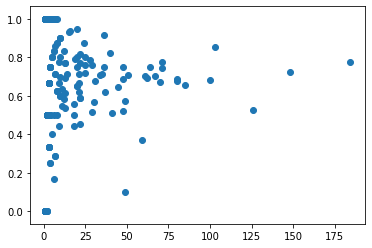

In [56]:
# Visualizing through scatter plot to check any significant pattern
matplotlib.pyplot.scatter(rater_goodness['count'],rater_goodness['mean'])

In [ ]:
# As we see from the plot: 
# Number of ratings by a turker on gold set URLs is NOT related to his or her accuracy

## [Q7] Overall predicted odds
Consider each url u that is not in the gold set, and each category c. For the pair (u, c), calculate the product of odds of all turks who (a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url. For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-set urls than 75% of these 269 turks. We can think of these as our “reliable” turks. Now, our belief that url u belongs to category c depends on how many “reliable” turks rated u as c; specifically, our belief is based on the product of their reliability scores (i.e., their odds). We shall call such products of odds the overall odds henceforth

In [57]:
rater_goodness_75 = rater_goodness[rater_goodness['count'] > rater_goodness['count'].quantile(0.75)]
rater_goodness_75.reset_index('turk',inplace=True)
rater_goodness_75 = pd.merge(labels_unknown, rater_goodness_75[['turk','odds']], on = 'turk', how = 'left')

# calculating the final product 
overall_odds = rater_goodness_75.dropna().groupby(['url', 'category'])['odds'].prod().unstack()
overall_odds.T

url,http://0-101.net,http://000.cc,http://0000.jp,http://000relationships.com,http://000vitamins.com,http://000webhost.com,http://003my.com,http://007absolutehardcore.com/early_cumshots/index.html,http://007swz.cn,http://01768.com,...,http://zucaiba.com,http://zumin-ads.com,http://zune.net,http://zvezdanews.ru,http://zwame.pt,http://zwinky.com,http://zylom.com,http://zynga.com,http://zz868.com,http://zzx.cc
category,,,,,,,,,,,,,,,,,,,,,
G,2.155963,1.460583,14.488244,5.681060,3.784982,11.159502,4.91204,NaN,1.393883,1.393883,...,1.432532,2.779429,20.209842,5.831416,8.62379,16.141443,1.735526,3.704611,1.047852,1.330229
P,NaN,NaN,NaN,1.851852,NaN,NaN,NaN,3.346522,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851852,NaN
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.290450,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.252871,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.620746


## [Q8] Predicted categories
Create a DataFrame (called result 75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the top odds should be the overall odds for that top category. These are our predictions, and the confidence we have in them (higher overall odds implies greater confidence). If you want, you can check to see if the predicted categories make sense.

In [58]:
result_75 = pd.DataFrame({'top odds': overall_odds.T.max().values, 'category': overall_odds.T.idxmax().values},
                                                                                         index = overall_odds.T.idxmax().index)
result_75.head()

,top odds,category
url,,
http://0-101.net,2.155963,G
http://000.cc,1.460583,G
http://0000.jp,14.488244,G
http://000relationships.com,5.681060,G
http://000vitamins.com,3.784982,G


## [Q9] Predicted categories using more turks

Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction? Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings). Call this result 25. Now let’s see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells contain the number of urls with these as the top categories according to result 75 and result 25. For example, the cell corresponding to the row category=R and the column category=G would be the number of URLs that were predicted to be R by result 75 but predicted to be G by result 25. Where are the most errors?

In [59]:
# Ques 9

rater_goodness_25 = rater_goodness[rater_goodness['count'] > rater_goodness['count'].quantile(0.25)]
rater_goodness_25.reset_index('turk',inplace=True)
rater_goodness_25 = pd.merge(labels_unknown, rater_goodness_25[['turk','odds']], on = 'turk', how = 'left')
overall_odds25 = rater_goodness_25.dropna().groupby(['url', 'category'])['odds'].prod().unstack()

result_25 = pd.DataFrame({'top odds': overall_odds25.T.max().values, 'category': overall_odds25.T.idxmax().values},
                                                                                         index = overall_odds25.T.idxmax().index)

merge_75_25 = result_75.merge(result_25, left_on = "url", right_on = "url", suffixes = ['_75', '_25'])

compare = pd.crosstab(merge_75_25['category_75'], merge_75_25['category_25'], margins = True)
compare

category_25,G,P,R,X,All
category_75,,,,,
G,8327,574,186,216,9303
P,189,328,47,19,583
R,21,34,128,25,208
X,27,6,26,457,516
All,8564,942,387,717,10610


In [ ]:
# Most error: category_75 = G and category_25 = P -> 574